Import the Libraries

In [ ]:
import pandas as pd
import numpy as np

Loading and Debuging the Dataset

In [ ]:
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

In [ ]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true["label"]=1

In [ ]:
fake["label"]=0

In [ ]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
news=pd.concat([true,fake])

In [ ]:
news.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


Data Preprocessing

In [ ]:
news.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


Features Selection

In [ ]:
news.drop(["title","subject","date"],axis=1,inplace=True)

In [ ]:
news.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


Random Shuffling the dataframe

In [ ]:
news = news.sample(frac=1)

In [ ]:
news.head()

,text,label
14303,Black Lives Matter is our campaign :,0
11474,CAIRO (Reuters) - President Abdel Fattah al-Si...,1
18019,This unhinged high school teacher was caught t...,0
18863,A Muslim teenager from New Jersey was accepted...,0
6697,A police officer in Atlanta has been caught on...,0


In [ ]:
news.reset_index(inplace=True)

In [ ]:
news.head()

,index,text,label
0,14303,Black Lives Matter is our campaign :,0
1,11474,CAIRO (Reuters) - President Abdel Fattah al-Si...,1
2,18019,This unhinged high school teacher was caught t...,0
3,18863,A Muslim teenager from New Jersey was accepted...,0
4,6697,A police officer in Atlanta has been caught on...,0


In [ ]:
news.drop(["index"],axis=1,inplace=True)

In [ ]:
news.head()

,text,label
0,Black Lives Matter is our campaign :,0
1,CAIRO (Reuters) - President Abdel Fattah al-Si...,1
2,This unhinged high school teacher was caught t...,0
3,A Muslim teenager from New Jersey was accepted...,0
4,A police officer in Atlanta has been caught on...,0


EDA

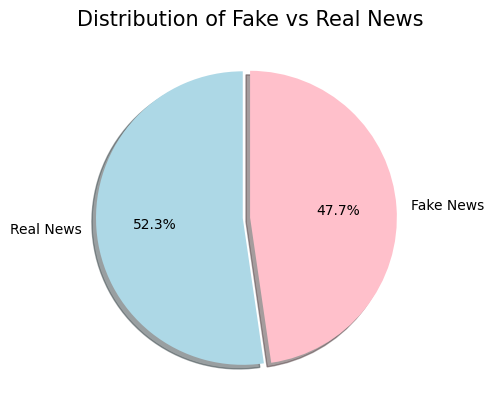

In [ ]:
import matplotlib.pyplot as plt

# Get value counts for pie chart
value_counts = news['label'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(value_counts,
        labels=['Real News', 'Fake News'],
        colors=['lightblue', 'pink'],  # Green for real, red for fake
        autopct='%1.1f%%',
        startangle=90,
        explode=(0.05, 0),  # Slight separation for emphasis
        shadow=True)

plt.title('Distribution of Fake vs Real News',
          fontsize=15)

plt.tight_layout()
plt.show()


In [ ]:
value_counts = news['label'].value_counts()
value_counts

,count
label,
0,23481
1,21417


**Import Regular Expressions**:A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern.

RegEx can be used to check if a string contains the specified search pattern.

In [ ]:
import re

In [ ]:
import string
import re

def clean_text(text):

    text = text.lower()
    text = text.replace('\n', ' ')
    text = re.sub(r'\d+', ' ', text)
    text = text.translate(str.maketrans(' ', ' ', string.punctuation))
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    return text

In [ ]:
news['text'] = news['text'].apply(clean_text)

In [ ]:
news['text']

,text
0,black lives matter is our campaign
1,cairo reuters president abdel fattah alsisi sa...
2,this unhinged high school teacher was caught t...
3,a muslim teenager from new jersey was accepted...
4,a police officer in atlanta has been caught on...
...,...
44893,algonac mich reuters back in april there were ...
44894,goma democratic republic of congo reuters eigh...
44895,
44896,is the pope s defense of same sex marriage the...


In [ ]:
x = news['text']
y = news['label']

In [ ]:
x

,text
0,black lives matter is our campaign
1,cairo reuters president abdel fattah alsisi sa...
2,this unhinged high school teacher was caught t...
3,a muslim teenager from new jersey was accepted...
4,a police officer in atlanta has been caught on...
...,...
44893,algonac mich reuters back in april there were ...
44894,goma democratic republic of congo reuters eigh...
44895,
44896,is the pope s defense of same sex marriage the...


In [ ]:
y

,label
0,0
1,1
2,0
3,0
4,0
...,...
44893,1
44894,1
44895,0
44896,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
x_train.shape

(31428,)

In [ ]:
x_test.shape

(13470,)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorization = TfidfVectorizer()

In [ ]:
xv_train = vectorization.fit_transform(x_train)

In [ ]:
xv_test = vectorization.transform(x_test)

In [ ]:
xv_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6432512 stored elements and shape (31428, 177837)>

In [ ]:
xv_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2737476 stored elements and shape (13470, 177837)>

Using LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR=LogisticRegression()

In [ ]:
LR.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
perd_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test,y_test)

0.9861915367483296

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,perd_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7058
           1       0.98      0.99      0.99      6412

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



Using

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DTC=DecisionTreeClassifier()

In [ ]:
DTC.fit(xv_train,y_train)

DecisionTreeClassifier()

In [ ]:
Pred_dtc=DTC.predict(xv_test)

In [ ]:
DTC.score(xv_test,y_test)

0.9952487008166295

In [ ]:
print(classification_report(y_test,Pred_dtc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7058
           1       0.99      1.00      1.00      6412

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC=RandomForestClassifier()

In [ ]:
RFC.fit(xv_train,y_train)

RandomForestClassifier()

In [ ]:
pred_rfc=RFC.predict(xv_test)

In [ ]:
RFC.score(xv_test,y_test)

0.9858203414996288

In [ ]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7058
           1       0.98      0.99      0.99      6412

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [ ]:
import joblib
joblib.dump(vectorization, "vectorizer.jb")
joblib.dump(LR, "lr_model.jb")

['lr_model.jb']

In [ ]:
%%writefile app.py
import streamlit as st
import joblib

vectorizer = joblib.load('vectorizer.jb')
model = joblib.load('lr_model.jb')

st.title("Fake News Detector")
st.write("Enter a News Article below to check whether it is Fake or Real.")
news_input = st.text_area("News Article:")

if st.button('Check News'):
    if news_input.strip():
        transform_input = vectorizer.transform([news_input])
        prediction = model.predict(transform_input)

        if prediction[0] == 1:
            st.success("The News is Real!")
        else:
            st.error("The News is Fake!")
    else:
        st.warning("Please enter some text to analyze.")


Writing app.py


In [ ]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹
added 22 packages in 4s
⠹
⠹3 packages are looking for funding
⠹  run `npm fund` for details
⠹

In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

⠙your url is: https://clean-trees-cry.loca.lt
